In [ ]:
## 1️⃣ Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## 2️⃣ Load the Datasets

In [7]:
covid_cases = pd.read_csv('covid_19_india.csv')
covid_vaccine = pd.read_csv('covid_vaccine_statewise.csv')  
covid_testing = pd.read_csv('StatewiseTestingDetails.csv')

In [8]:
# Display first few rows
covid_cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [13]:
 ## 3️⃣ Explore the Data
# Check dataset info
print(covid_cases.info())  
print(covid_vaccine.info())  
print(covid_testing.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                  

In [10]:
# Check missing values
print(covid_cases.isnull().sum())  
print(covid_vaccine.isnull().sum())  
print(covid_testing.isnull().sum())

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64
Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Do

In [11]:
# Basic statistics
print(covid_cases.describe())  
print(covid_vaccine.describe())  
print(covid_testing.describe())  

                Sno         Cured         Deaths     Confirmed
count  18110.000000  1.811000e+04   18110.000000  1.811000e+04
mean    9055.500000  2.786375e+05    4052.402264  3.010314e+05
std     5228.051023  6.148909e+05   10919.076411  6.561489e+05
min        1.000000  0.000000e+00       0.000000  0.000000e+00
25%     4528.250000  3.360250e+03      32.000000  4.376750e+03
50%     9055.500000  3.336400e+04     588.000000  3.977350e+04
75%    13582.750000  2.788698e+05    3643.750000  3.001498e+05
max    18110.000000  6.159676e+06  134201.000000  6.363442e+06
       Total Doses Administered      Sessions        Sites   \
count              7.621000e+03  7.621000e+03   7621.000000   
mean               9.188171e+06  4.792358e+05   2282.872064   
std                3.746180e+07  1.911511e+06   7275.973730   
min                7.000000e+00  0.000000e+00      0.000000   
25%                1.356570e+05  6.004000e+03     69.000000   
50%                8.182020e+05  4.547000e+04    597.00

In [15]:
# 4️⃣ Data Cleaning
# Convert date columns
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])  
covid_vaccine['Updated On'] = pd.to_datetime(covid_vaccine['Updated On'])  
covid_testing['Date'] = pd.to_datetime(covid_testing['Date']) 

In [16]:
# Fill missing values
covid_cases.fillna(0, inplace=True)  
covid_vaccine.fillna(0, inplace=True)  
covid_testing.fillna(0, inplace=True) 

In [17]:
# 5️⃣ COVID Cases Analysis
## Top 10 states with the highest cases

In [18]:
statewise_cases = covid_cases.groupby('State/UnionTerritory')['Confirmed'].max().reset_index()  
statewise_cases = statewise_cases.sort_values(by='Confirmed', ascending=False).head(10)  
print(statewise_cases)  

   State/UnionTerritory  Confirmed
27          Maharashtra    6363442
28       Maharashtra***    6229596
22               Kerala    3586693
21            Karnataka    2921049
20           Karanataka    2885238
38           Tamil Nadu    2579130
1        Andhra Pradesh    1985182
43        Uttar Pradesh    1708812
45          West Bengal    1534999
12                Delhi    1436852


In [19]:
##Plot daily cases trend

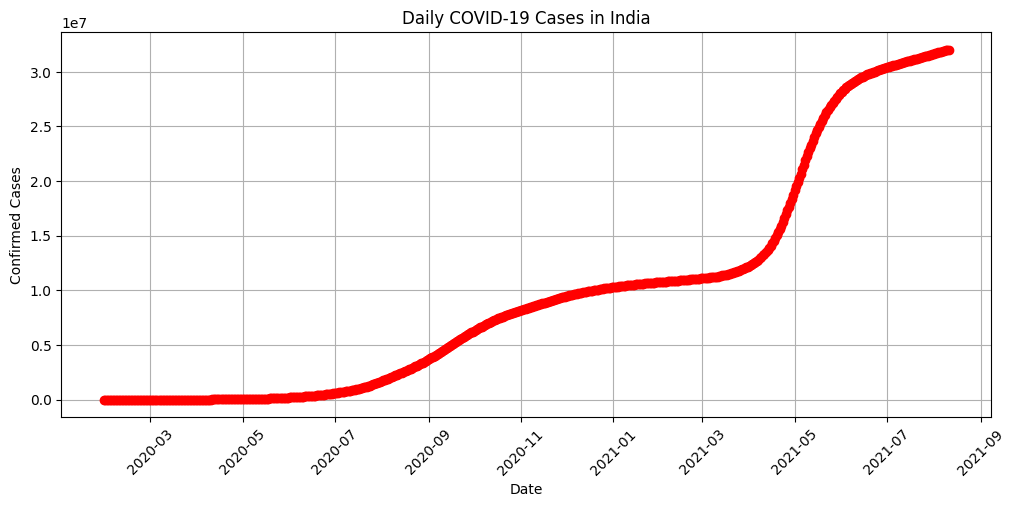

In [20]:
daily_cases = covid_cases.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily_cases['Date'], daily_cases['Confirmed'], color='red', marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Daily COVID-19 Cases in India')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [21]:
# 6️⃣ Vaccination Analysis
## Top 10 states with the highest vaccinations

In [22]:
statewise_vaccine = covid_vaccine.groupby('State')['Total Individuals Vaccinated'].max().reset_index()
statewise_vaccine = statewise_vaccine.sort_values(by='Total Individuals Vaccinated', ascending=False).head(10)
print(statewise_vaccine)

             State  Total Individuals Vaccinated
13           India                   250656880.0
34   Uttar Pradesh                    24782239.0
21     Maharashtra                    24046509.0
29       Rajasthan                    19090259.0
10         Gujarat                    18826982.0
16       Karnataka                    17493598.0
20  Madhya Pradesh                    16512594.0
36     West Bengal                    15798841.0
4            Bihar                    13127210.0
31      Tamil Nadu                    11658908.0


In [23]:
# Vaccination trend over time

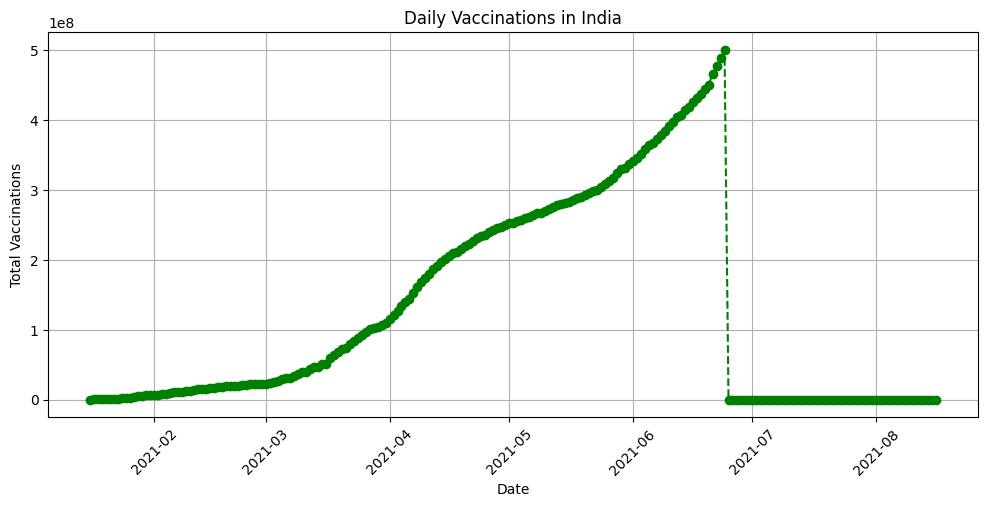

In [24]:
daily_vaccine = covid_vaccine.groupby('Updated On')['Total Individuals Vaccinated'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily_vaccine['Updated On'], daily_vaccine['Total Individuals Vaccinated'], color='green', marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Daily Vaccinations in India')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [25]:
# 7️⃣ Testing Analysis
## Top 10 states with the highest testing

In [26]:
statewise_testing = covid_testing.groupby('State')['TotalSamples'].max().reset_index()
statewise_testing = statewise_testing.sort_values(by='TotalSamples', ascending=False).head(10)
print(statewise_testing)


             State  TotalSamples
33   Uttar Pradesh    67897856.0
20     Maharashtra    49905065.0
15       Karnataka    40104915.0
30      Tamil Nadu    39002757.0
4            Bihar    38820518.0
16          Kerala    28745545.0
10         Gujarat    26192626.0
1   Andhra Pradesh    25311733.0
8            Delhi    24333906.0
31       Telangana    22991849.0


In [27]:
## Testing trend over time

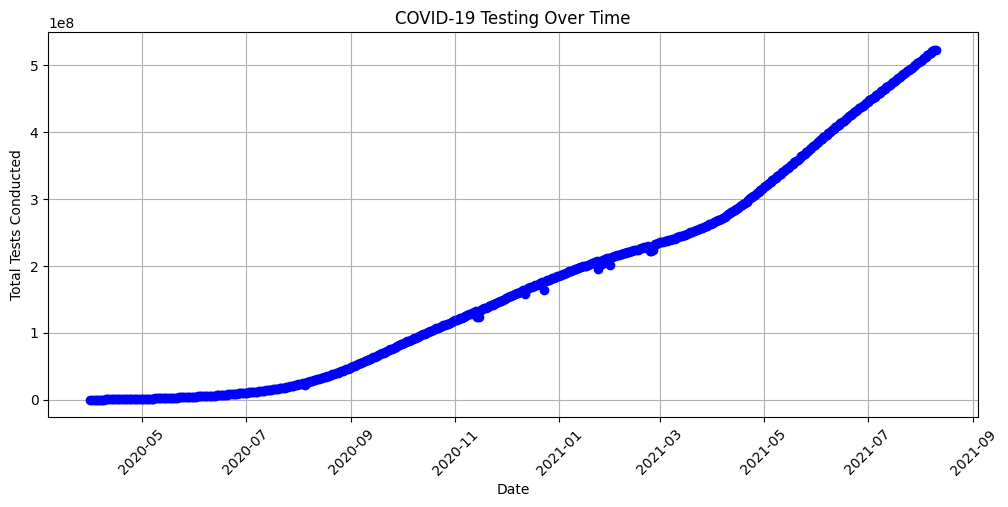

In [28]:
daily_testing = covid_testing.groupby('Date')['TotalSamples'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily_testing['Date'], daily_testing['TotalSamples'], color='blue', marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Total Tests Conducted')
plt.title('COVID-19 Testing Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [29]:
# 8️⃣ Correlation Analysis
## Check the relationship between cases, testing, and vaccination.

In [30]:
## merge dataset on date and state

In [31]:
merged_data = covid_cases.merge(covid_testing, on=['State/UnionTerritory', 'Date'], how='inner')
merged_data = merged_data.merge(covid_vaccine, left_on=['State/UnionTerritory', 'Date'], right_on=['State', 'Updated On'], how='inner')

KeyError: 'State/UnionTerritory'

In [37]:
#detecting the names of column
print("Covid Cases Columns:", covid_cases.columns)
print("Covid Testing Columns:", covid_testing.columns)
print("Covid Vaccine Columns:", covid_vaccine.columns)


Covid Cases Columns: Index(['Sno', 'Date', 'Time', 'State', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')
Covid Testing Columns: Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')
Covid Vaccine Columns: Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)

In [38]:
# rename the column
covid_cases.rename(columns={'State/UnionTerritory': 'State'}, inplace=True)


In [39]:
# Convert Date Columns to datetime Format
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
covid_testing['Date'] = pd.to_datetime(covid_testing['Date'])
covid_vaccine['Updated On'] = pd.to_datetime(covid_vaccine['Updated On'])


In [40]:
# now perform the merge operation
merged_data = covid_cases.merge(covid_testing, on=['State', 'Date'], how='inner')
merged_data = merged_data.merge(covid_vaccine, left_on=['State', 'Date'], right_on=['State', 'Updated On'], how='inner')


In [41]:
# select the relavent column
merged_data = merged_data[['Confirmed', 'TotalSamples', 'Total Individuals Vaccinated']]


In [42]:
#compute the corelation
correlation_matrix = merged_data.corr()
print(correlation_matrix)

                              Confirmed  TotalSamples  \
Confirmed                      1.000000      0.733489   
TotalSamples                   0.733489      1.000000   
Total Individuals Vaccinated   0.453691      0.443265   

                              Total Individuals Vaccinated  
Confirmed                                         0.453691  
TotalSamples                                      0.443265  
Total Individuals Vaccinated                      1.000000  


In [43]:
# 9️⃣ Summary Report

In [44]:
summary = pd.DataFrame({
    'Total Cases': [covid_cases['Confirmed'].max()],
    'Total Deaths': [covid_cases['Deaths'].max()],
    'Total Recovered': [covid_cases['Cured'].max()],
    'Total Tests': [covid_testing['TotalSamples'].max()],
    'Total Vaccinated': [covid_vaccine['Total Individuals Vaccinated'].max()]
})

print(summary)

   Total Cases  Total Deaths  Total Recovered  Total Tests  Total Vaccinated
0      6363442        134201          6159676   67897856.0       250656880.0
